In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [55]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
311,spam,Think ur smart ? Win å£200 this week in our we...,NaN,NaN,NaN
2000,ham,But i'll b going 2 sch on mon. My sis need 2 t...,NaN,NaN,NaN
687,ham,"Dear,Me at cherthala.in case u r coming cochin...",NaN,NaN,NaN
557,ham,I know that my friend already told that.,NaN,NaN,NaN
2579,ham,I dunno until when... Lets go learn pilates...,NaN,NaN,NaN


In [56]:
df.shape

(5572, 5)

In [57]:
# 1. Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
#drop last 3 values because lots of values are missing
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [59]:
df.sample(5)


,v1,v2
4363,ham,So what about you. What do you remember
2497,ham,Dai what this da.. Can i send my resume to thi...
2846,spam,Free-message: Jamster!Get the crazy frog sound...
215,ham,Finally the match heading towards draw as your...
732,ham,Lol you won't feel bad when I use her money to...


In [60]:
# renaming the cols 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
293,ham,Are you this much buzy
433,ham,Booked ticket for pongal?
5149,ham,Pls call me da. What happen.
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
3910,ham,How i noe... She's in da car now... Later then...


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder=LabelEncoder()

In [63]:
df['target']=encoder.fit_transform(df['target'])

In [64]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [66]:
df.duplicated().sum()

403

In [67]:
#remove duplicate 
df=df.drop_duplicates(keep="first")

In [68]:
df.duplicated().sum()

0

In [69]:
df.shape

(5169, 2)

In [70]:
# 2. EDA
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [72]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

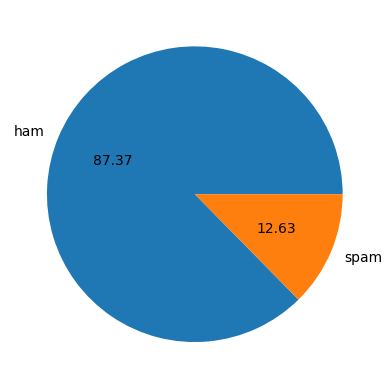

In [73]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.show

In [74]:
# Data is imbalanced
import nltk

In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhaumik
[nltk_data]     Surve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
df['num_characters']=df['text'].apply(len)

In [77]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [78]:
#num of words
df['num+words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [79]:
df.head()

,target,text,num_characters,num+words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [80]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [81]:
df.head()

,target,text,num_characters,num+words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [82]:
df[["num_characters","num+words","num_sentences"]].describe()

,num_characters,num+words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
df[df["target"]==0][["num_characters","num+words","num_sentences"]].describe()

,num_characters,num+words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
#spam
df[df["target"]==1][["num_characters","num+words","num_sentences"]].describe()


,num_characters,num+words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [85]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

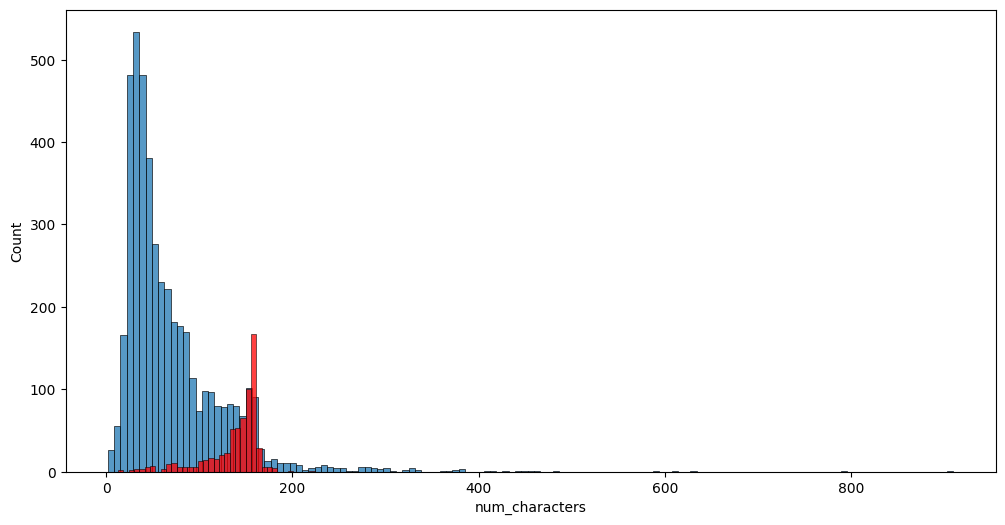

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color='red')

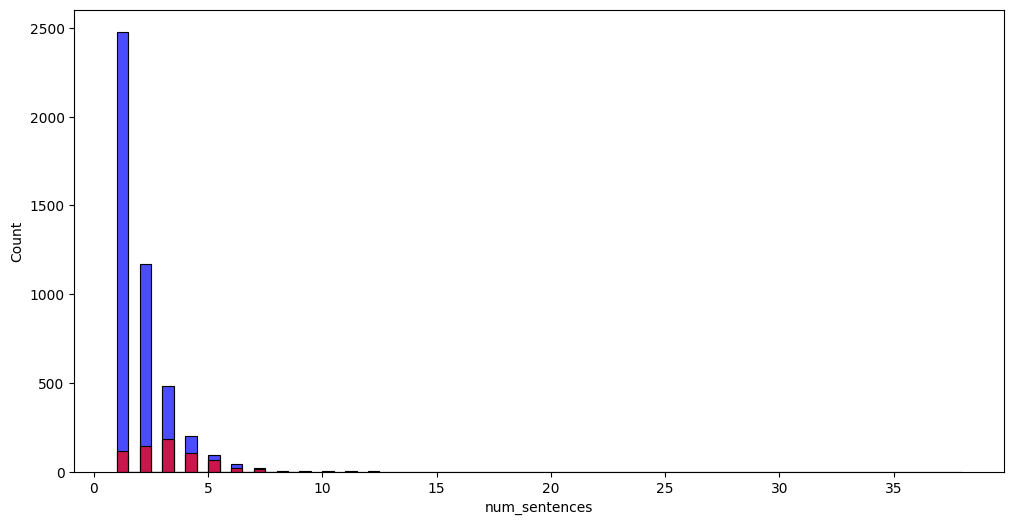

In [87]:
plt.figure(figsize=(12,6))

# For target == 0, you can adjust binwidth to control the bar size
sns.histplot(df[df["target"]==0]["num_sentences"], binwidth=0.5, kde=False, color='blue', alpha=0.7)

# For target == 1, you can similarly adjust binwidth and set a different color
sns.histplot(df[df["target"]==1]["num_sentences"], binwidth=0.5, kde=False, color='red', alpha=0.7)

plt.show()

<Axes: xlabel='num+words', ylabel='Count'>

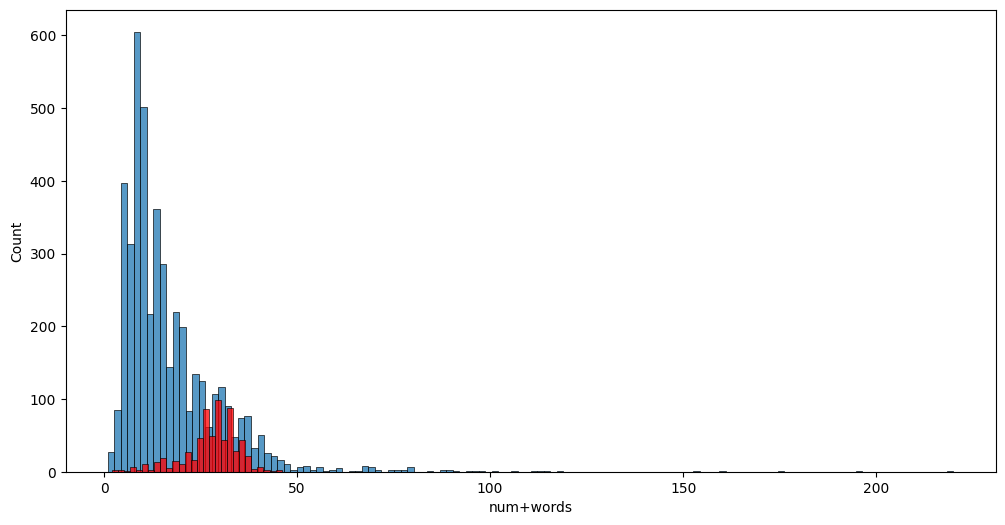

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num+words"])
sns.histplot(df[df["target"]==1]["num+words"],color='red')

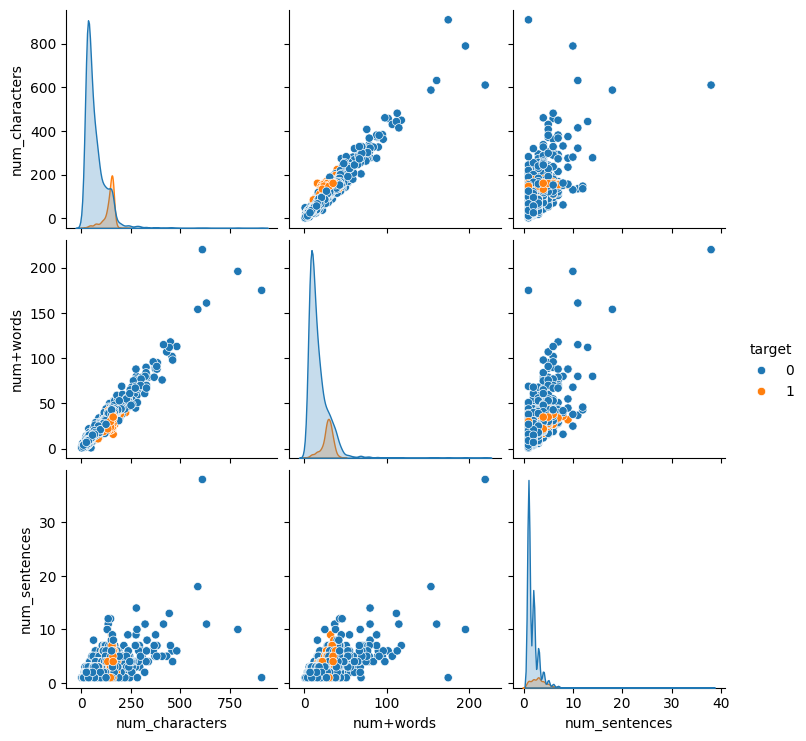

In [89]:
sns.pairplot(df,hue='target')

<Axes: >

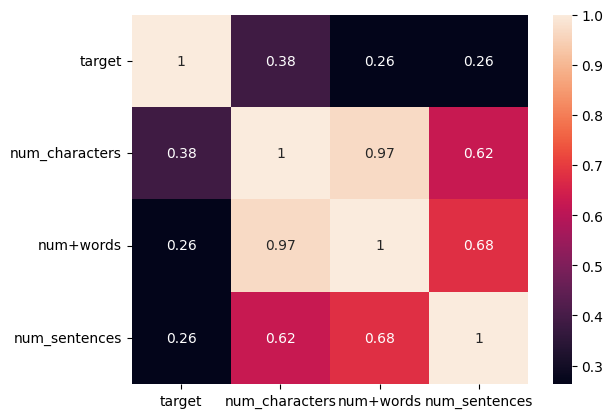

In [90]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [91]:
#3.Data Preprocessing (lower case , tokenization,removing special characters, removing stopwords , puncuations and stemming)


In [92]:
import re
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        i = re.sub(r'[^a-zA-Z0-9]', '', i) 
        if i:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [65]:
transform_text("Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&")

'free video camera phone half price line rental 12 mth 500 cross ntwk min 100 txt call mobileupd8 08001950382 call2optout674'

In [93]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\Bhaumik
[nltk_data]     Surve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [96]:
df['text'][3970]

'Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&'

In [97]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                 nah nt think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [98]:
df["transform_text"]=df['text'].apply(transform_text)

In [99]:
df.head()

,target,text,num_characters,num+words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [100]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


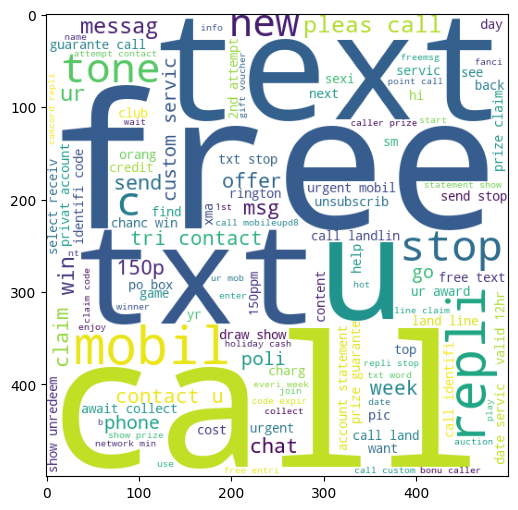

In [101]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [102]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

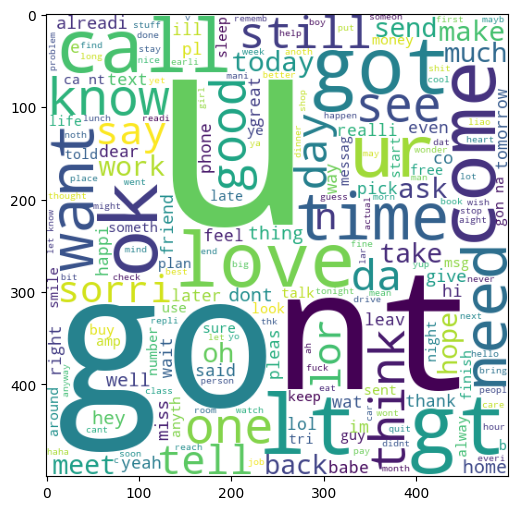

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num+words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [68]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [69]:
len(spam_corpus)

10925

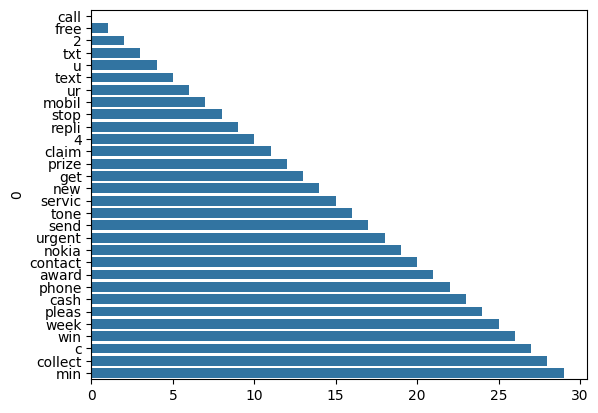

In [70]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='horizontal')
plt.show()

In [71]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)

36559

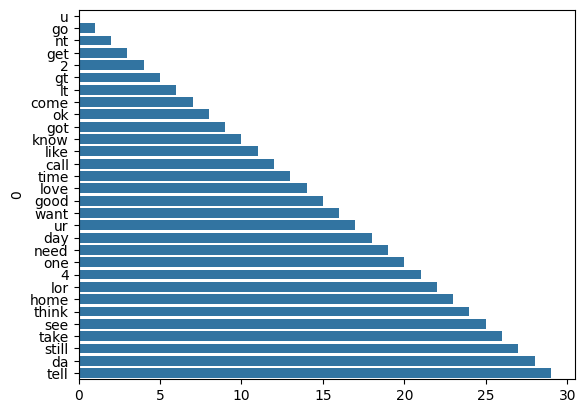

In [73]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='horizontal')
plt.show()

In [74]:
df.head()

,target,text,num_characters,num+words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [75]:
#4. Model Building

In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [105]:
 X= cv.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 7564)

In [106]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [110]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
svc =SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
rfc =RandomForestClassifier(n_estimators=50, random_state=2)

In [111]:
clfs={
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : bnb,
    'DT'  : dtc,
    'RF'  : rfc
}

In [112]:
def train_classifier (clf, X_train, y_train, X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision =precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    return accuracy, precision, recall , f1score

In [113]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items(): 
    current_accuracy, current_precision, current_recall, current_f1_score = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("Recall:", current_recall)
    print("F1 Score:", current_f1_score)
    
    # Append results to the renamed lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)

For SVC
Accuracy: 0.9342359767891683
Precision: 0.7777777777777778
Recall: 0.7101449275362319
F1 Score: 0.7424242424242424
For KN
Accuracy: 0.9032882011605415
Precision: 1.0
Recall: 0.2753623188405797
F1 Score: 0.4318181818181818
For NB
Accuracy: 0.9738878143133463
Precision: 0.9743589743589743
Recall: 0.8260869565217391
F1 Score: 0.8941176470588236
For DT
Accuracy: 0.9284332688588007
Precision: 0.9210526315789473
Recall: 0.5072463768115942
F1 Score: 0.6542056074766355
For RF
Accuracy: 0.9690522243713733
Precision: 0.9818181818181818
Recall: 0.782608695652174
F1 Score: 0.8709677419354839


In [114]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1score':f1_scores})

In [115]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1score
0,SVC,0.934236,0.777778,0.710145,0.742424
1,KN,0.903288,1.000000,0.275362,0.431818
2,NB,0.973888,0.974359,0.826087,0.894118
3,DT,0.928433,0.921053,0.507246,0.654206
4,RF,0.969052,0.981818,0.782609,0.870968


In [116]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.934236
1,KN,Accuracy,0.903288
2,NB,Accuracy,0.973888
3,DT,Accuracy,0.928433
4,RF,Accuracy,0.969052
5,SVC,Precision,0.777778
6,KN,Precision,1.000000
7,NB,Precision,0.974359
8,DT,Precision,0.921053
9,RF,Precision,0.981818


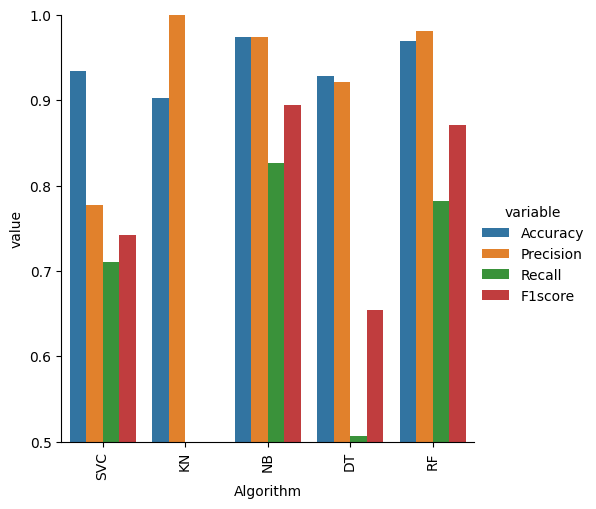

In [117]:
sns.catplot(x = 'Algorithm', y='value',hue ='variable', data= performance_df1, kind='bar', height=5)

plt.ylim(0.5,1.0)

plt.xticks(rotation='vertical')

plt.show()

In [133]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))


0.8868471953578336
[[794 102]
 [ 15 123]]
0.5466666666666666
0.8913043478260869
0.6776859504132231


In [134]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))



0.9690522243713733
[[875  21]
 [ 11 127]]
0.8581081081081081
0.9202898550724637
0.8881118881118881


In [135]:

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))


0.9738878143133463
[[893   3]
 [ 24 114]]
0.9743589743589743
0.8260869565217391
0.8941176470588236


In [136]:
a= tfidf.fit_transform(df['transform_text']).toarray()

In [120]:
a.shape


(5169, 4000)

In [121]:
b=df['target'].values
b

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

In [119]:
gnb.fit(a_train,b_train)
b_pred1=gnb.predict(a_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))
print(recall_score(b_test,b_pred1))
print(f1_score(b_test,b_pred1))

0.8810444874274661
[[795 101]
 [ 22 116]]
0.5345622119815668
0.8405797101449275
0.6535211267605634


In [120]:
mnb.fit(a_train,b_train)
b_pred2=mnb.predict(a_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))
print(recall_score(b_test,b_pred2))
print(f1_score(b_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.782608695652174
0.8780487804878049


In [121]:
bnb.fit(a_train,b_train)
b_pred3=bnb.predict(a_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))
print(recall_score(b_test,b_pred3))
print(f1_score(b_test,b_pred3))

0.9854932301740812
[[896   0]
 [ 15 123]]
1.0
0.8913043478260869
0.9425287356321839


In [125]:
def train_classifiers (clf, a_train, b_train, a_test,b_test):
    clf.fit(a_train, b_train)
    b_pred= clf.predict(a_test)
    accuracy= accuracy_score(b_test,b_pred)
    precision =precision_score(b_test,b_pred)
    recall=recall_score(b_test,b_pred)
    f1score=f1_score(b_test,b_pred)
    return accuracy, precision, recall , f1score

In [126]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items(): 
    current_accuracy, current_precision, current_recall, current_f1_score = train_classifiers(clf, a_train, b_train, a_test, b_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("Recall:", current_recall)
    print("F1 Score:", current_f1_score)
    
    # Append results to the renamed lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)

For SVC
Accuracy: 0.9738878143133463
Precision: 0.9743589743589743
Recall: 0.8260869565217391
F1 Score: 0.8941176470588236
For KN
Accuracy: 0.9032882011605415
Precision: 1.0
Recall: 0.2753623188405797
F1 Score: 0.4318181818181818
For NB
Accuracy: 0.9854932301740812
Precision: 1.0
Recall: 0.8913043478260869
F1 Score: 0.9425287356321839
For DT
Accuracy: 0.9342359767891683
Precision: 0.8571428571428571
Recall: 0.6086956521739131
F1 Score: 0.711864406779661
For RF
Accuracy: 0.9748549323017408
Precision: 0.9912280701754386
Recall: 0.8188405797101449
F1 Score: 0.8968253968253969


In [127]:
performance_dfs=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1score':f1_scores})

In [129]:
performance_dfs

,Algorithm,Accuracy,Precision,Recall,F1score
0,SVC,0.973888,0.974359,0.826087,0.894118
1,KN,0.903288,1.000000,0.275362,0.431818
2,NB,0.985493,1.000000,0.891304,0.942529
3,DT,0.934236,0.857143,0.608696,0.711864
4,RF,0.974855,0.991228,0.818841,0.896825


In [130]:
performance_df2 = pd.melt(performance_dfs, id_vars = "Algorithm")

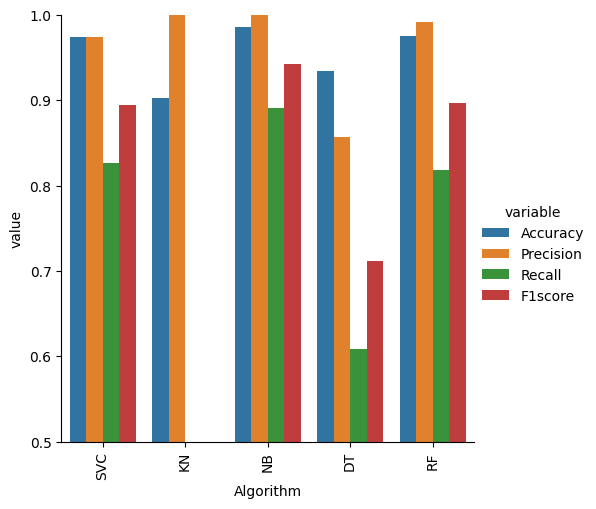

In [131]:
sns.catplot(x = 'Algorithm', y='value',hue ='variable', data= performance_df2, kind='bar', height=5)

plt.ylim(0.5,1.0)

plt.xticks(rotation='vertical')

plt.show()

In [128]:
import pickle

In [123]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))